Loan Prediction

In [129]:
# Read the data

import pandas as pd

loan = pd.read_csv("https://datahack-prod.s3.amazonaws.com/train_file/train_ctrUa4K.csv")
loan_test = pd.read_csv("https://datahack-prod.s3.amazonaws.com/test_file/test_lAUu6dG.csv")
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [130]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


# Data Quality Report:

The data quality report will contain two table one for each, 1) categorical & 2) Continious features for ABT(Analytical based tables)

I have used standard stastical measures of central tendency and varience

In [131]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return bound(*args, **kwds)


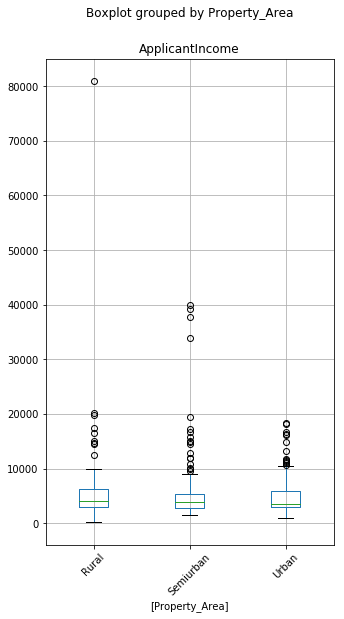

In [132]:
loan.dropna().boxplot(column = ['ApplicantIncome'], figsize=(5,9), by = ['Property_Area'], rot = 45)

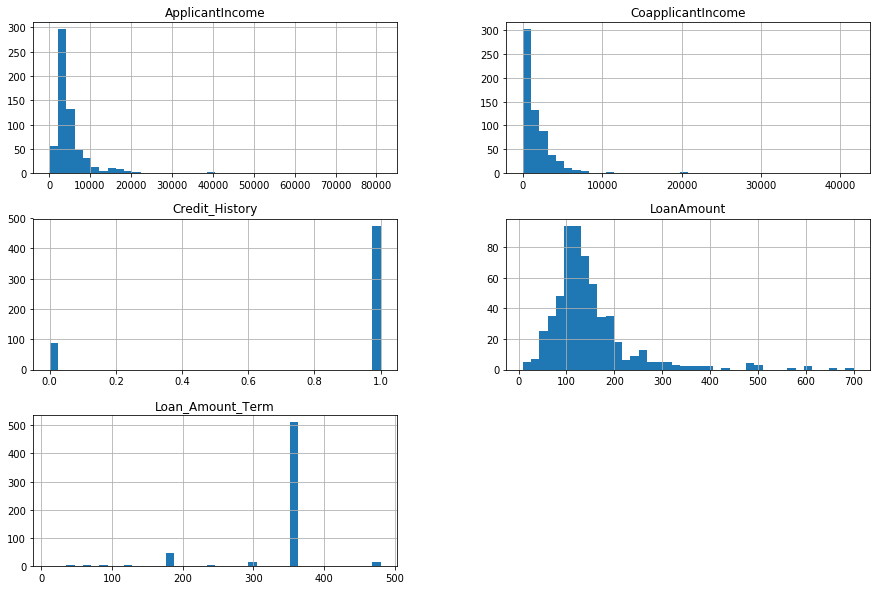

In [133]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

loan.hist(bins=40, figsize=(15,10))

plt.show()

In [134]:
loan['Gender'].value_counts().sort_values(ascending=True)/len(loan)

Female    0.182410
Male      0.796417
Name: Gender, dtype: float64

In [135]:
loan['Married'].value_counts().sort_values(ascending=True)/len(loan)

No     0.346906
Yes    0.648208
Name: Married, dtype: float64

In [136]:
loan['Education'].value_counts().sort_values(ascending=True)/len(loan)

Not Graduate    0.218241
Graduate        0.781759
Name: Education, dtype: float64

In [137]:
loan['Self_Employed'].value_counts().sort_values(ascending=True)/len(loan)

Yes    0.133550
No     0.814332
Name: Self_Employed, dtype: float64

In [138]:
loan['Property_Area'].value_counts().sort_values(ascending=True)/len(loan)

Rural        0.291531
Urban        0.328990
Semiurban    0.379479
Name: Property_Area, dtype: float64

In [139]:
loan['Loan_Status'].value_counts().sort_values(ascending=True)/len(loan)

N    0.312704
Y    0.687296
Name: Loan_Status, dtype: float64

In [174]:
loan['Dependents'].value_counts().sort_values(ascending=True)/len(loan)

3+    0.083062
2     0.164495
1     0.166124
0     0.561889
Name: Dependents, dtype: float64

# Feature Engineering

To improve this result further, you could:
Compare many more models and tune hyperparameters using cross validation and grid search,
Do more feature engineering, for example:
replace "ApplicantIncome" and "CoapplicantIncome" with their sum,

try to convert numerical attributes to categorical attributes: for example, different age groups, so it may help to create an age bucket category and use it instead of the age. Similarly, it may be useful to have a special category for people traveling alone since only 30% of them survived (see below).

In [194]:
loan['Loan_Status_1'] = (loan['Loan_Status'] == 'Y') +0   # creating integer Loan status "Y = 1"

loan[["Dependents", "Loan_Status_1"]].groupby(['Dependents']).mean()  # No pattern to distinguish this class 

,Loan_Status_1
Dependents,
0,0.689855
1,0.647059
2,0.752475
3+,0.647059


In [ ]:
#loan["AgeBucket"] = train_data["Age"] // 15 * 15
#train_data[["AgeBucket", "Survived"]].groupby(['AgeBucket']).mean()

In [196]:
loan["TotalIncome"] = loan["ApplicantIncome"] + loan["CoapplicantIncome"]

# Train test split

In [197]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(loan, test_size=0.2, random_state=51)

# Missing Values

In [198]:
# strategy

# Any field with more than 60% missing should be removed

sample_incomplete_rows = loan[loan.isnull().any(axis=1)].head()
sample_incomplete_rows

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Status_1,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1,5849.0
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y,1,4340.0
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y,1,3596.0
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y,1,6100.0
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N,0,5282.0


In [199]:
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [200]:
import numpy as np

loan_num = train_set.loc[:,train_set.dtypes!=np.object].head()

In [201]:
loan_num.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status_1', 'TotalIncome'],
      dtype='object')

In [217]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(['TotalIncome', 'LoanAmount',
                                                               'Loan_Amount_Term', 'Credit_History'])),
        ("imputer", SimpleImputer(strategy="median")),
        ("scaling", StandardScaler())
    ])

In [218]:
num_pipeline.fit_transform(train_set)

array([[-0.62030307, -0.57614272,  0.27972194,  0.41790088],
       [ 4.47752156,  0.05915976,  0.27972194,  0.41790088],
       [-0.50481647, -0.59967244,  0.27972194,  0.41790088],
       ...,
       [-0.46700487, -0.62320217,  0.27972194,  0.41790088],
       [-0.40647699, -0.18790232,  0.27972194,  0.41790088],
       [-0.23471266, -0.14084287,  0.27972194,  0.41790088]])

In [219]:
# Inspired from stackoverflow.com/questions/25239958
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [220]:
try:
    from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder # Scikit-Learn < 0.20

In [221]:
import numpy as np

loan_cat = loan.loc[:10,loan.dtypes==np.object]
loan_cat.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [222]:
cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector([ 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area'])),
        ("imputer", MostFrequentImputer()),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

In [223]:
cat_pipeline.fit_transform(train_set)

array([[0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [224]:
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
                                                     ("num_pipeline", num_pipeline),
                                                     ("cat_pipeline", cat_pipeline),
                                                                                    ])

In [225]:
X_train = preprocess_pipeline.fit_transform(train_set)
X_train

array([[-0.62030307, -0.57614272,  0.27972194, ...,  0.        ,
         1.        ,  0.        ],
       [ 4.47752156,  0.05915976,  0.27972194, ...,  0.        ,
         1.        ,  0.        ],
       [-0.50481647, -0.59967244,  0.27972194, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.46700487, -0.62320217,  0.27972194, ...,  0.        ,
         1.        ,  0.        ],
       [-0.40647699, -0.18790232,  0.27972194, ...,  1.        ,
         0.        ,  0.        ],
       [-0.23471266, -0.14084287,  0.27972194, ...,  1.        ,
         0.        ,  0.        ]])

In [271]:
Y_train = train_set['Loan_Status']
Y_test = test_set['Loan_Status']

# Training ML models

In [227]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm_clf.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [228]:
X_test = preprocess_pipeline.transform(test_set)
y_pred = svm_clf.predict(X_test)

In [229]:
from sklearn.model_selection import cross_val_score

svm_scores = cross_val_score(svm_clf, X_train, Y_train, cv=10)
svm_scores.mean()

0.8024489795918367

In [230]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_scores = cross_val_score(forest_clf, X_train, Y_train, cv=10)
forest_scores.mean()

0.78

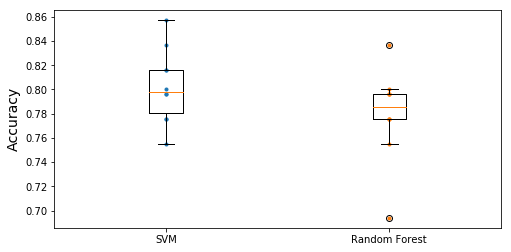

In [231]:
plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.boxplot([svm_scores, forest_scores], labels=("SVM","Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

In [237]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_clf = RandomForestClassifier(random_state=51)
#scoring='neg_mean_squared_error'
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_clf, param_grid, cv=10,
                           return_train_score=True)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=51,
                                 

In [238]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [239]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=51, verbose=0,
                       warm_start=False)

In [240]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

nan {'max_features': 2, 'n_estimators': 3}
nan {'max_features': 2, 'n_estimators': 10}
nan {'max_features': 2, 'n_estimators': 30}
nan {'max_features': 4, 'n_estimators': 3}
nan {'max_features': 4, 'n_estimators': 10}
nan {'max_features': 4, 'n_estimators': 30}
nan {'max_features': 6, 'n_estimators': 3}
nan {'max_features': 6, 'n_estimators': 10}
nan {'max_features': 6, 'n_estimators': 30}
nan {'max_features': 8, 'n_estimators': 3}
nan {'max_features': 8, 'n_estimators': 10}
nan {'max_features': 8, 'n_estimators': 30}
nan {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
nan {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
nan {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
nan {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
nan {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
nan {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


In [242]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(X_train, Y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=-inf, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [246]:
from sklearn.model_selection import cross_val_score
sgd_score = cross_val_score(sgd_clf, X_train, Y_train, cv=10, scoring="accuracy")

In [263]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear", random_state=42)
logit_score = cross_val_score(log_reg, X_train, Y_train, cv=10, scoring="accuracy")

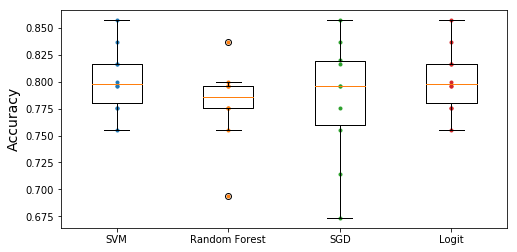

In [264]:
plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.plot([3]*10, sgd_score, ".")
plt.plot([4]*10, logit_score, ".")
plt.boxplot([svm_scores, forest_scores, sgd_score, logit_score], labels=("SVM","Random Forest","SGD","Logit"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

In [249]:
from sklearn.model_selection import cross_val_predict

Y_train_pred = cross_val_predict(sgd_clf, X_train, Y_train, cv=3)

In [250]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_train, Y_train_pred)

array([[ 68,  88],
       [ 60, 275]])

In [258]:
from sklearn.metrics import precision_score, recall_score

precision_score(Y_train_1, Y_train_pred_1)


0.7575757575757576

In [259]:
recall_score(Y_train_1, Y_train_pred_1)

0.8208955223880597

In [261]:
275/(275+60)

0.8208955223880597

In [262]:
from sklearn.metrics import f1_score
f1_score(Y_train_1, Y_train_pred_1)

0.7879656160458453

# Ensemble Learning and Random forest

In [279]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma="auto", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [280]:
voting_clf.fit(X_train, Y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,...
                                        

In [281]:
from sklearn.metrics import accuracy_score

for clf in (log_reg, forest_clf, svm_clf, sgd_clf, voting_clf):
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(Y_test, y_pred))

LogisticRegression 0.8292682926829268
RandomForestClassifier 0.8211382113821138
SVC 0.8373983739837398
SGDClassifier 0.8455284552845529
VotingClassifier 0.8292682926829268


# Bagging and Pasting

In [287]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, Y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(Y_test, y_pred_tree))

0.6910569105691057


In [283]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, Y_train)
y_pred = bag_clf.predict(X_test)

In [286]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, y_pred))

0.8130081300813008


# Boosting